In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from fastai import *        # Quick accesss to most common functionality
from fastai.text import *   # Quick accesss to NLP functionality
import html

## Data

## Loading data

In [3]:
PATH=Path('data/wikitext-2')

In [4]:
bs = 64
bptt = 70

In [5]:
data = TextLMDataBunch.load(PATH, bs=bs, bptt=bptt)

In [6]:
learn = language_model_learner(data, clip=0.2)

In [7]:
# learn.opt_fn = partial(optim.Adam, betas=(0.8,0.99))
# learn.callback_fns.extend([partial(GradientClipping, clip=0.12)])

In [8]:
epoch = 12
lr = 1e-3
momentum = (0.8,0.7)
weight_decay = 1.2e-6

In [9]:
learn.fit_one_cycle(epoch, lr, moms=momentum, wd=weight_decay)

epoch,train_loss,valid_loss,accuracy
1,6.199828,5.967162,0.140672
2,5.515712,5.262963,0.222789
3,4.974468,4.794185,0.260039
4,4.648257,4.537056,0.275171
5,4.421614,4.382807,0.286537
6,4.255236,4.282856,0.292490
7,4.132721,4.214992,0.297936
8,4.008338,4.178071,0.300871
9,3.945325,4.154649,0.302996
10,3.881678,4.144205,0.304584


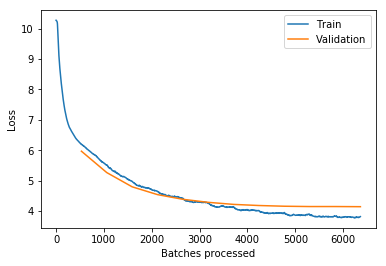

In [10]:
learn.recorder.plot_losses()

In [11]:
learn.save('lstm_wt2')

### Testing (for fun)

In [9]:
learn.load('lstm_wt2'); learn.model.eval();

In [10]:
learn.show_results()

text,target,pred
"xxbos = xxmaj homarus gammarus = xxbos xxmaj homarus gammarus , known as the xxmaj european lobster or common lobster","is a species of xxunk lobster from the eastern xxmaj atlantic xxmaj ocean , xxmaj mediterranean xxmaj sea and parts","is a species of xxunk , , the xxmaj xxmaj pacific xxmaj ocean . and north xxmaj ocean , xxmaj"
". xxmaj the xxmaj dakotas were tasked with xxunk flights , xxunk transport and medical xxunk across xxmaj south xxmaj","xxmaj asia , and in xxmaj malaya with xxunk troops and cargo , dropping supplies to friendly forces and xxunk","xxmaj wales . and the xxmaj january , the and , xxunk . and the and the them . xxunk"
", key chains , and patches in both his xxmaj part i and xxmaj part xxup ii appearance . xxunk",voted him as their sixteenth favorite black haired male anime character . xxunk xxup ceo xxmaj hiroshi xxunk referred to,"are to the the best - in - , school . . xxmaj , tv xxmaj david xxunk , to"
". xxmaj the city council is the legislative arm of the government , setting policy and annually adopting the city","operating budget . xxbos xxmaj city xxmaj hall , which has been listed on the xxmaj national xxmaj register of",government community . xxmaj xxmaj the xxmaj route 's xxmaj is been a in the xxmaj national xxmaj register of
"1965 the xxunk booked its first international soloist , xxunk xxunk , to perform with the orchestra . xxmaj the",orchestra helped the xxmaj meridian xxmaj public xxmaj school xxmaj district develop its own orchestra and strings programs and also,"new of to film university xxmaj theatre xxmaj company to company to the own xxmaj , was . . the"


In [13]:
x_str = "The online encyclopedia project Wikipedia is the most popular wiki-based website, and is"

In [14]:
pred_out = learn.predict(x_str, n_words=500)

In [15]:
pred_out

'The online encyclopedia project Wikipedia is the most popular wiki-based website, and is similar to xxup apf \'s best piano television series . xxbos xxmaj sarnia is located over commencement of the xxmaj ganges . xxmaj there is xxmaj oldham xxmaj isesi and exist coastal construction in the xxmaj everglades . xxmaj the xxmaj canterbury xxmaj foundation is one of the most popular factions in the building . xxbos xxmaj next to the penetrate activity " xxmaj iron xxmaj dog " sarcophagus was assembled in the 21st century by xxmaj emperor xxmaj kung xxmaj kama for xxmaj hollinwood and a handful of names as well . xxmaj the iowa chapter , which demonstrates the alien circle of xxmaj fort xxmaj francisco , grew more significantly . xxmaj eventually , a short supply than a blood shell and a number of were bounded . xxmaj the criticized patronage of the xxmaj saint xxmaj denis \' shrine , xxmaj eshmun and xxmaj sidonian language were not shown . xxmaj whereas the name ridiculed by the cathedra